# [Lab Session 4](deconvolution.ipynb)

In [67]:
import numpy as np
import matplotlib.pyplot as plt

import scipy

from skimage.restoration import wiener
from scipy.signal import convolve2d as conv
from scipy.stats import multivariate_normal as multi_normal

np.random.seed(0)

Load the image.

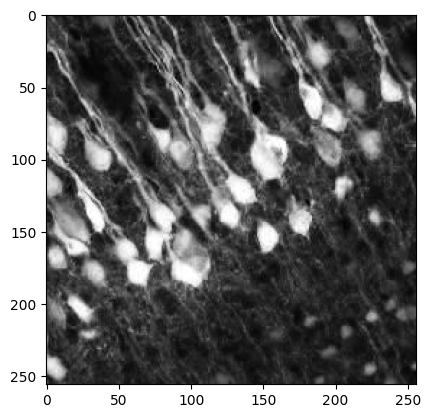

In [68]:
img = plt.imread('data/cells.png')[128:384, 128:384]
plt.imshow(img, 'gray')

**[Task 1.]()** Apply the following PSF to the image and then display it.

In [69]:
psf_size = 5
psf = np.ones((psf_size, psf_size)) / psf_size ** 2

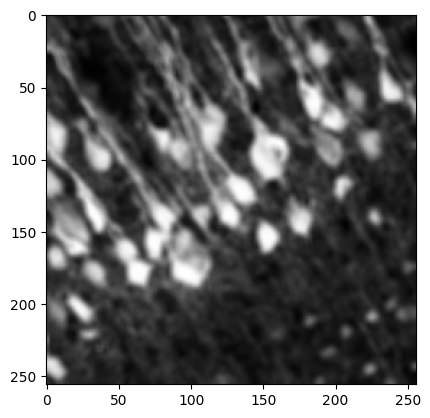

In [70]:
img_conv = conv(img, psf, mode='same',
boundary='symm')
plt.imshow(img_conv, 'gray')

**[Task 2.]()** Have a look at the Gaussian PSF which is not uniformly distributed. Apply it to the image.

Text(0.5, 1.0, 'Gleichverteilt')

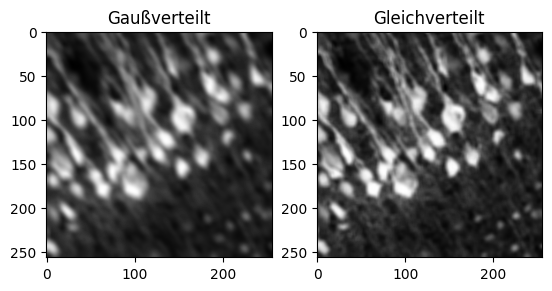

In [71]:
def create_psf(size):
    factor = size * 1.8
    x, y = np.mgrid[0:size:1, 0:size:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    rv = multi_normal([int(size / 2), (int(size / 2))], [[factor * 1., factor * 1.2], [factor * .5, factor * .7]])
    return rv.pdf(pos)
    
img_conv_1 = conv(img, create_psf(10), mode='same',
boundary='symm')

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_conv_1, 'gray')
plt.title("Gaußverteilt")
plt.subplot(1, 2, 2)
plt.imshow(img_conv, 'gray')
plt.title("Gleichverteilt")


Apply the second psf to the image:

**[Task 3.]()** Implement a reusable function that performs the Richardson-Lucy deconvolution.

In [72]:
from scipy.signal import convolve
def richardson_lucy_deconvolution(image, psf, n_iterations):
    img_deconv = np.full(image.shape, 0.5)
    
    # Flip the PSF
    psf_flipped = np.flip(psf)
    
    for _ in range(n_iterations):
        # Convolve current estimation with PSF
        relative_blur = convolve(img_deconv, psf, mode='same')
        
        # Compute the ratio
        ratio = image / relative_blur
        
        # Convolve ratio with flipped PSF
        ratio = convolve(ratio, psf_flipped, mode='same')
        
        # Update the deconvolved image
        img_deconv *= ratio
    
    
    img_deconv = img_deconv.clip(0,1)
    return img_deconv

**[Task 4.]()** Apply the Richardson-Lucy deconvolution to the blurred image.

In [73]:
img_deconv = richardson_lucy_deconvolution(img_conv, psf, 10)

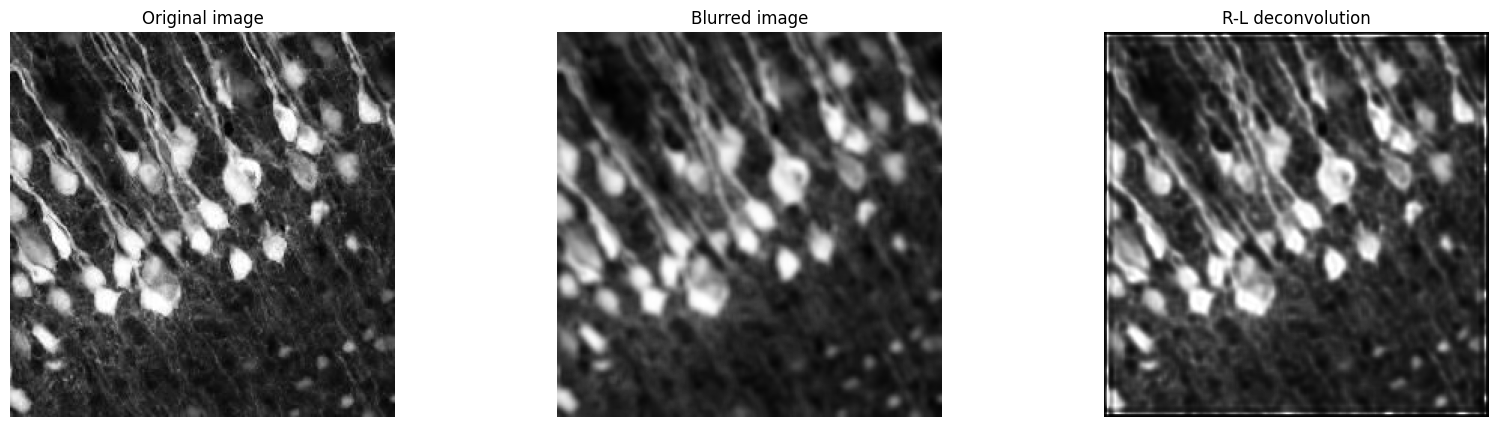

In [74]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_conv, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(img_deconv, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 5.]()** Add noise to the image, use the R-L deconvolution again.

In [75]:
noise = (np.random.normal(loc=0,size=img.shape))
reduce_factor = 5
noise = noise / reduce_factor



Text(0.5, 1.0, 'Original image')

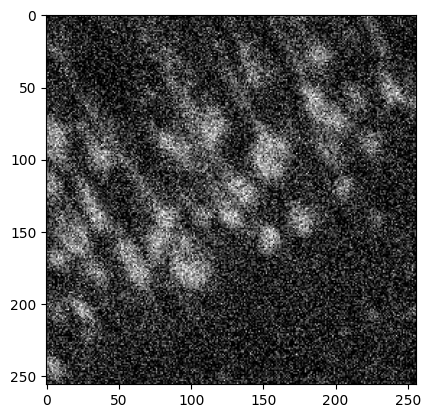

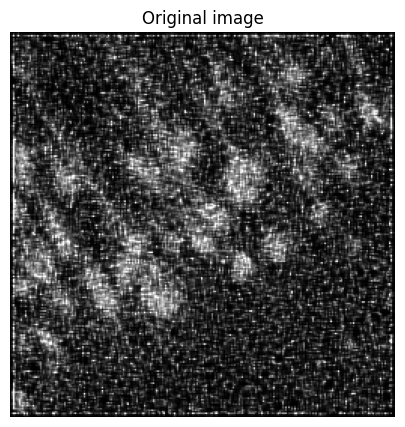

In [76]:
img_conv_2 = img_conv_1 + noise
img_conv_2_clip = np.clip(img_conv_2, 0, 1)
plt.imshow(img_conv_2_clip, 'gray')

img_deconv_2 = richardson_lucy_deconvolution(img_conv_2_clip, psf, 10)

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img_deconv_2, 'gray')
plt.title('Original image')


**[Task 6.]()** Compare your R-L implementation to a wiener deconvolution.

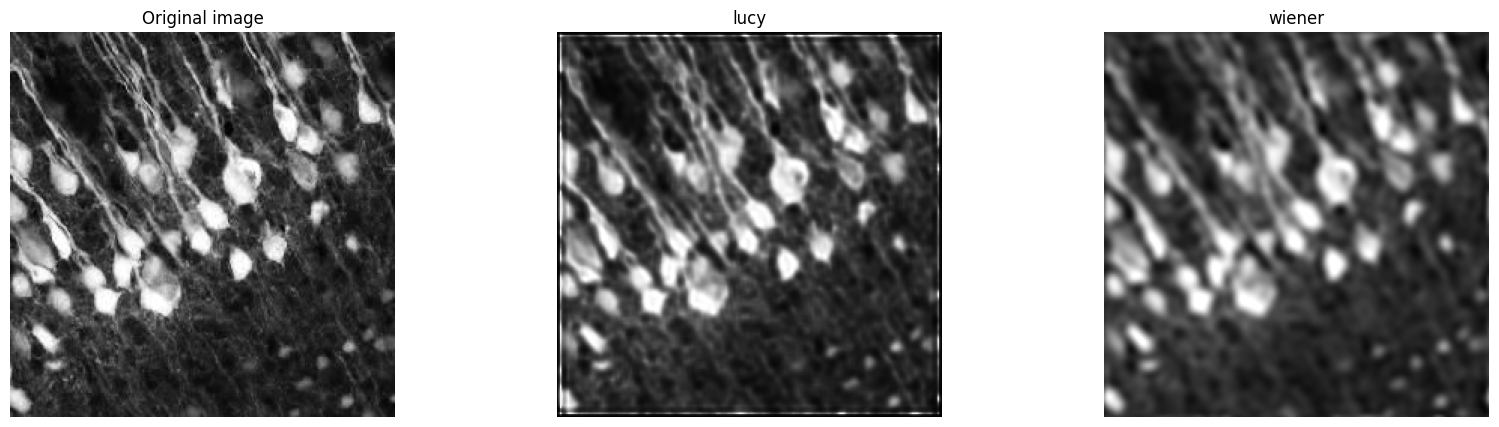

In [77]:
img_wiener = wiener(img_conv, psf, balance=2, clip=True)

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_deconv, 'gray')
plt.title('lucy')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(img_wiener, 'gray')
plt.title('wiener')
plt.show()

**[Task 7.]()** Repeat Tasks 4–6 using a smaller value for the size of the PSF.

In [ ]:
#psf oben druchgetauscht

**[Task 8.]()** Use a wrong PSF to restore the image